# Coercion clustering techniques krok 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/home/wmoszczy/2/Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
## 440 klientów według 7 cech

data.shape

(440, 8)

In [4]:
data.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [5]:
data.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

## NORMALIZACJA

In [6]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


##  dendrogram, który pomoże nam określić liczbę klastrów dla tego konkretnego problemu

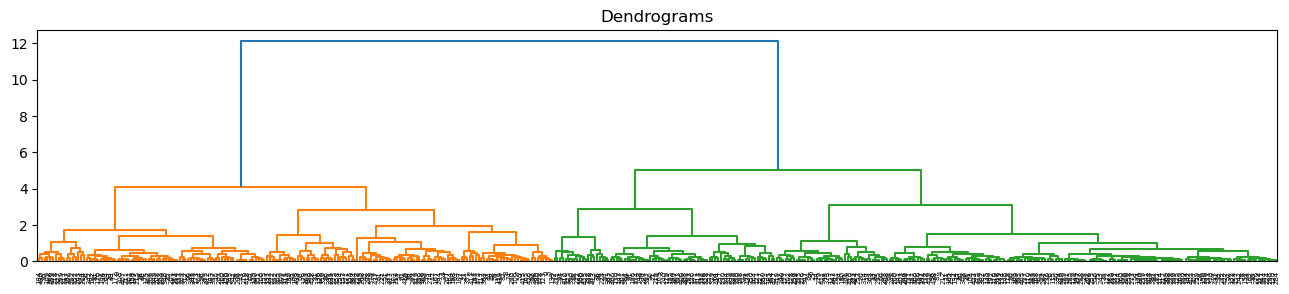

In [7]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16, 3))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

Oś x zawiera próbki, a oś y przedstawia odległość między tymi próbkami. Linia pionowa z maksymalną odległością jest linią niebieską, dlatego możemy ustalić próg 6 i wyciąć dendrogram:

## Co to za próbki?

In [8]:
data2 = data.head(20)

In [9]:
data_scaled2 = normalize(data2)
data_scaled2 = pd.DataFrame(data_scaled2, columns=data2.columns)
data_scaled2

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294
5,0.000146,0.000218,0.684944,0.600972,0.372997,0.048462,0.130615,0.105583
6,0.000136,0.000204,0.824476,0.217508,0.474247,0.032636,0.213496,0.037056
7,0.000145,0.000217,0.548036,0.358368,0.681593,0.120685,0.240141,0.185547
8,0.000105,0.000315,0.625457,0.382637,0.649477,0.044578,0.179991,0.078667
9,0.000083,0.000125,0.250143,0.462010,0.786371,0.048271,0.309242,0.087379


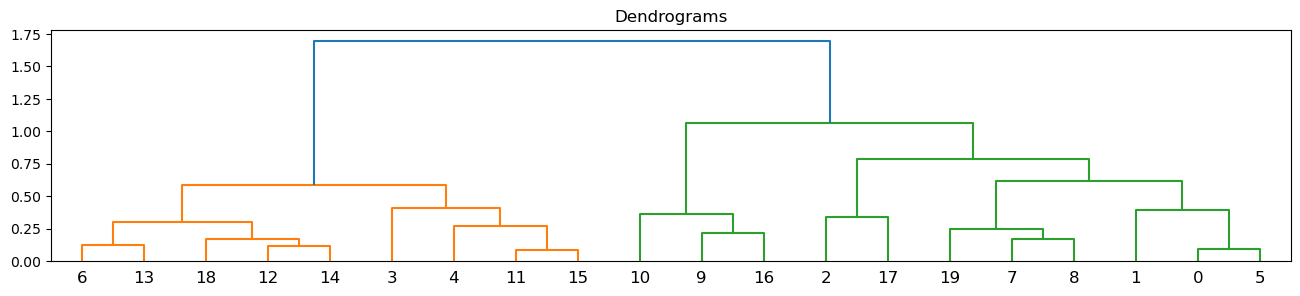

In [10]:
plt.figure(figsize=(16, 3))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled2, method='ward'))

# Analizujemy próbkę ('transakcji') 6 i 13

In [11]:
data_scaled2.loc[[6, 13], :]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
6,0.000136,0.000204,0.824476,0.217508,0.474247,0.032636,0.213496,0.037056
13,0.000072,0.000108,0.765560,0.223999,0.540586,0.111675,0.242004,0.021722


# Analizujemy próbkę ('transakcji') 11 i 15

In [12]:
data_scaled2.loc[[11, 15], :]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
11,0.000142,0.000214,0.936369,0.080061,0.322166,0.101144,0.039104,0.035401
15,0.000090,0.000271,0.927421,0.100765,0.345623,0.035910,0.087197,0.037267


## Czy można takie coś zrobić dla klientów a nie dla transakcji?

Tworzę grupę 100 fikcyjnych klientów

In [13]:
data7 = data

In [14]:
data7['ID_custom1'] = (data7['Fresh']*4)+(data7['Frozen']*3)+ data7['Grocery']+(data7['Milk']/2)

In [15]:
data7['ID_customer'] = pd.qcut(data7['ID_custom1'],18)

In [16]:
data7['ID_customer'].value_counts()

(2877.499, 13680.778]       25
(41422.778, 46323.278]      25
(104718.083, 131495.056]    25
(71541.167, 82387.778]      25
(57760.111, 63776.722]      25
(169432.833, 531800.5]      25
(33120.25, 36258.5]         25
(19221.667, 24017.833]      25
(36258.5, 41422.778]        24
(46323.278, 53507.5]        24
(13680.778, 19221.667]      24
(28670.222, 33120.25]       24
(63776.722, 71541.167]      24
(24017.833, 28670.222]      24
(82387.778, 91823.556]      24
(91823.556, 104718.083]     24
(131495.056, 169432.833]    24
(53507.5, 57760.111]        24
Name: ID_customer, dtype: int64

### Koduje przedziały robiąc z nich ID

In [17]:
data7['ID_customer'] = pd.Categorical(data7['ID_customer']).codes
data7['ID_customer'].value_counts()

10    25
7     25
12    25
15    25
5     25
2     25
0     25
17    25
13    24
6     24
11    24
1     24
14    24
9     24
8     24
4     24
16    24
3     24
Name: ID_customer, dtype: int64

In [18]:
#data7.reset_index()
#data7 = data7.set_index(data7.ID_customer) 
#del data7.ID_customer
#del data7.ID_custom2
#del data7.ID_custom1

data7

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,ID_custom1,ID_customer
0,2,3,12669,9656,7561,214,2674,1338,63707.0,10
1,2,3,7057,9810,9568,1762,3293,1776,47987.0,8
2,2,3,6353,8808,7684,2405,3516,7844,44715.0,7
3,1,3,13265,1196,4221,6404,507,1788,77091.0,12
4,2,3,22615,5410,7198,3915,1777,5185,112108.0,15
...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,180269.5,17
436,1,3,39228,1431,764,4510,93,2346,171921.5,17
437,2,3,14531,15488,30243,437,14841,1867,97422.0,14
438,1,3,10290,1981,2232,1038,168,2125,47496.5,8


In [20]:
data7.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'ID_custom1', 'ID_customer'],
      dtype='object')

In [21]:
del data7['ID_custom1']

## TABELA PRZESTAWNA OPARTA NA DOMINANCIE

In [25]:
PA7 = data7.pivot_table(index=['ID_customer'],
               values=['Channel',
                       'Region',
                       'Fresh',
                       'Milk',
                       'Grocery',
                       'Frozen',
                       'Detergents_Paper',
                       'Delicassen'],
               aggfunc='mean').reset_index()

PA7

,ID_customer,Channel,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Region
0,0,1.040000,432.640000,916.840000,766.400000,486.360000,2729.800000,2297.400000,2.640000
1,1,1.166667,1078.500000,1786.000000,1562.833333,851.625000,5319.375000,4305.625000,2.583333
2,2,1.360000,1091.800000,2740.040000,2243.680000,1207.720000,6793.320000,4867.160000,2.680000
3,3,1.625000,928.291667,4054.666667,2704.750000,1046.125000,9709.208333,5495.333333,2.291667
4,4,1.250000,1338.833333,2089.166667,4079.666667,2045.625000,6149.500000,4767.875000,2.583333
5,5,1.360000,1522.000000,3746.520000,4505.000000,1745.960000,8743.640000,5214.720000,2.480000
6,6,1.458333,1045.875000,3728.083333,5387.416667,1865.125000,8475.208333,5606.666667,2.583333
7,7,1.320000,961.440000,2061.160000,6946.320000,2423.360000,6609.320000,4806.240000,2.400000
8,8,1.416667,1351.250000,2582.083333,8098.333333,2639.416667,6787.083333,5092.250000,2.625000
9,9,1.333333,918.166667,3494.583333,8440.083333,3150.541667,9534.208333,5389.833333,2.375000


## NORMALIZACJA PA7

In [28]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler (feature_range = (0, 1)) 

PA8 = PA7

PA8[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']] = scaler.fit_transform (PA8[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']])

In [29]:
PA8

,ID_customer,Channel,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Region
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.696667
1,1,0.216524,0.148688,0.238071,0.017308,0.035219,0.218826,0.192890,0.583333
2,2,0.547009,0.151750,0.499392,0.032103,0.069555,0.343378,0.246826,0.776667
3,3,1.000000,0.114108,0.859481,0.042123,0.053973,0.589778,0.307162,0.000000
4,4,0.358974,0.208621,0.321111,0.072002,0.150347,0.288973,0.237289,0.583333
5,5,0.547009,0.250790,0.775076,0.081245,0.121453,0.508185,0.280209,0.376667
6,6,0.715100,0.141177,0.770026,0.100421,0.132943,0.485502,0.317855,0.583333
7,7,0.478632,0.121739,0.313440,0.134298,0.186769,0.327829,0.240974,0.216667
8,8,0.643875,0.211480,0.456126,0.159333,0.207601,0.342851,0.268445,0.666667
9,9,0.501425,0.111777,0.706069,0.166760,0.256885,0.574990,0.297028,0.166667


##  dendrogram, który pomoże nam określić liczbę klastrów dla tego konkretnego problemu

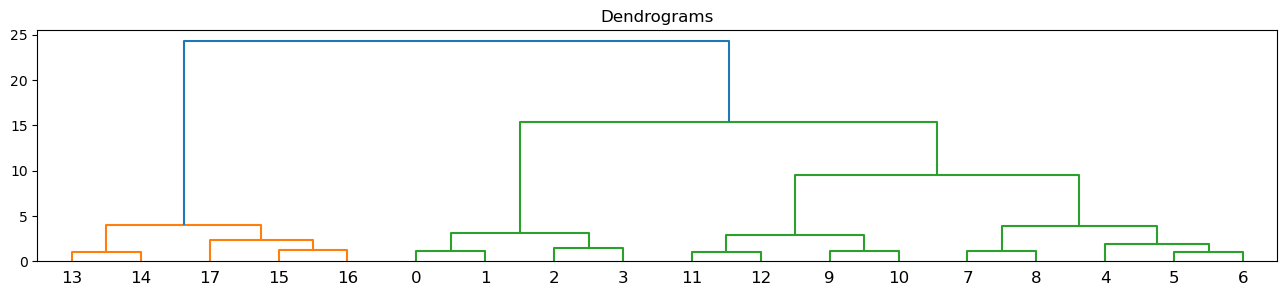

In [30]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16, 3))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(PA8, method='ward'))

# Analizujemy próbkę ('klientów')  13 i 14

In [34]:
PA8.loc[[13, 14], :]

,ID_customer,Channel,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Region
13,13,0.430199,0.203988,0.572857,0.328247,0.370393,0.473471,0.257292,0.583333
14,14,0.501425,0.279116,0.850328,0.383323,0.350390,0.584560,0.269134,0.583333


# Analizujemy próbkę ('klientów') 5 i 6

In [35]:
PA8.loc[[5, 6], :]

,ID_customer,Channel,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Region
5,5,0.547009,0.250790,0.775076,0.081245,0.121453,0.508185,0.280209,0.376667
6,6,0.715100,0.141177,0.770026,0.100421,0.132943,0.485502,0.317855,0.583333


# Analizujemy próbkę ('klientów') 13 i 6

In [36]:
PA8.loc[[13, 6], :]

,ID_customer,Channel,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Region
13,13,0.430199,0.203988,0.572857,0.328247,0.370393,0.473471,0.257292,0.583333
6,6,0.715100,0.141177,0.770026,0.100421,0.132943,0.485502,0.317855,0.583333


# Klienci zostali przypisani -- TWORZYMY 3 KLASTRY

DLACZEGO TRZY ---> BO W POŁOWIE OSI Y jest wartość 25/2 = 13 
na wysokości 13 są 3 gałęzie

In [42]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
PA8['cluster']= cluster.fit_predict(PA8)

In [43]:
PA8

,ID_customer,Channel,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Region,cluster
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.696667,0
1,1,0.216524,0.148688,0.238071,0.017308,0.035219,0.218826,0.192890,0.583333,0
2,2,0.547009,0.151750,0.499392,0.032103,0.069555,0.343378,0.246826,0.776667,0
3,3,1.000000,0.114108,0.859481,0.042123,0.053973,0.589778,0.307162,0.000000,0
4,4,0.358974,0.208621,0.321111,0.072002,0.150347,0.288973,0.237289,0.583333,2
5,5,0.547009,0.250790,0.775076,0.081245,0.121453,0.508185,0.280209,0.376667,2
6,6,0.715100,0.141177,0.770026,0.100421,0.132943,0.485502,0.317855,0.583333,2
7,7,0.478632,0.121739,0.313440,0.134298,0.186769,0.327829,0.240974,0.216667,5
8,8,0.643875,0.211480,0.456126,0.159333,0.207601,0.342851,0.268445,0.666667,5
9,9,0.501425,0.111777,0.706069,0.166760,0.256885,0.574990,0.297028,0.166667,1


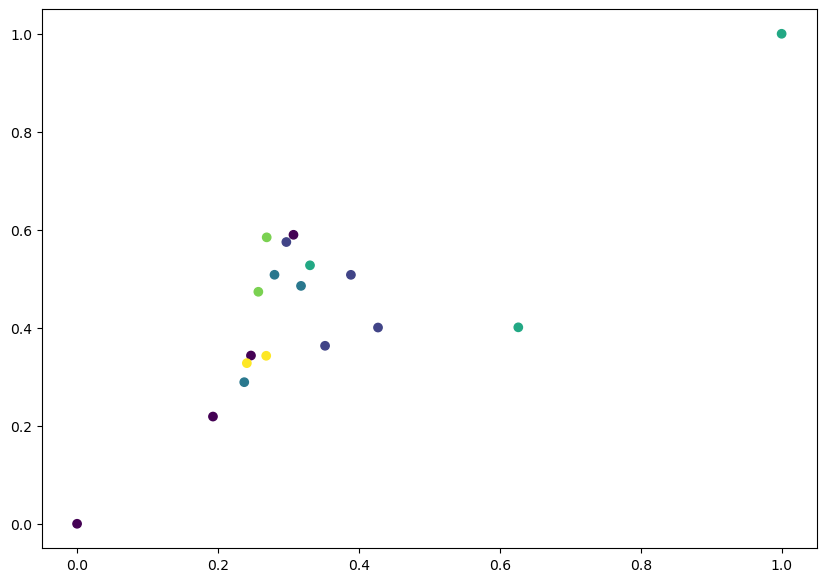

In [44]:
plt.figure(figsize=(10, 7))  
plt.scatter(PA8['Milk'], PA8['Grocery'], c=cluster.labels_) 

# jest za mało klientów? -----> robimy 200 klientów